In [91]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.colors as mcol


np.random.seed(12345)
n=3649

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

mean = df.mean(axis=1)
std_err = df.std(axis=1)/(np.sqrt(n))
mg_err = std_err*1.96
df['Mean'] = mean
df['Marg Err'] = mg_err
df

,0,1,2,3,4,5,6,7,8,9,...,3642,3643,3644,3645,3646,3647,3648,3649,Mean,Marg Err
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538,33312.107476,6509.789783
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855,41861.859541,3192.691699
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049,39493.304941,4554.526238
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908,47743.550969,2264.161925


In [92]:
df_col = pd.DataFrame()
nearest=100
df_col['Diff'] = nearest*(y-mean)//nearest
df_col['Sign'] = df_col['Diff'].abs()/df_col['Diff']
old_range = abs(df_col["Diff"]).min(), abs(df_col["Diff"]).max()
new_range = .5, 1

df_col['Shade'] = df_col['Sign']*np.interp(abs(df_col['Diff']), 
                                           old_range, new_range)
greens = cm.Greens
purples = cm.Purples
shade = df_col['Shade']
color = ['white' if x == 0 else greens(abs(x))
        if x <0 else purples(abs(x)) for x in shade] 

y=43_000

In [93]:
def diff(constant):
    '''
        Light Pink: Constant is above the height, but below the top of the confidence interval.
        Dark Pink: Constant is above the height and the confidence interval.
    
        Light Red: Constant is below the height, but above the bottom of the confidence interval.
        Dark Red: Constant is below the height and the confidence interval:
    '''
    
    diff_col = []
    
    for i, bar in enumerate(barplot):
        if (bar.get_height() + (df["Marg Err"].iloc[i])) > constant > bar.get_height():
             diff_col.append(0.25)
        elif (bar.get_height() + (df["Marg Err"].iloc[i]) < constant) and (bar.get_height() < constant):
              diff_col.append(0.0)
        elif bar.get_height() > constant > (bar.get_height() - (df["Marg Err"].iloc[i])):
              diff_col.append(0.75)
        elif (bar.get_height() - (df["Marg Err"].iloc[i]) > constant)and (bar.get_height() > constant):
              diff_col.append(1.0)
        print(bar.get_height() + (df["Marg Err"].iloc[i]))
            
    return diff_col

<IPython.core.display.Javascript object>


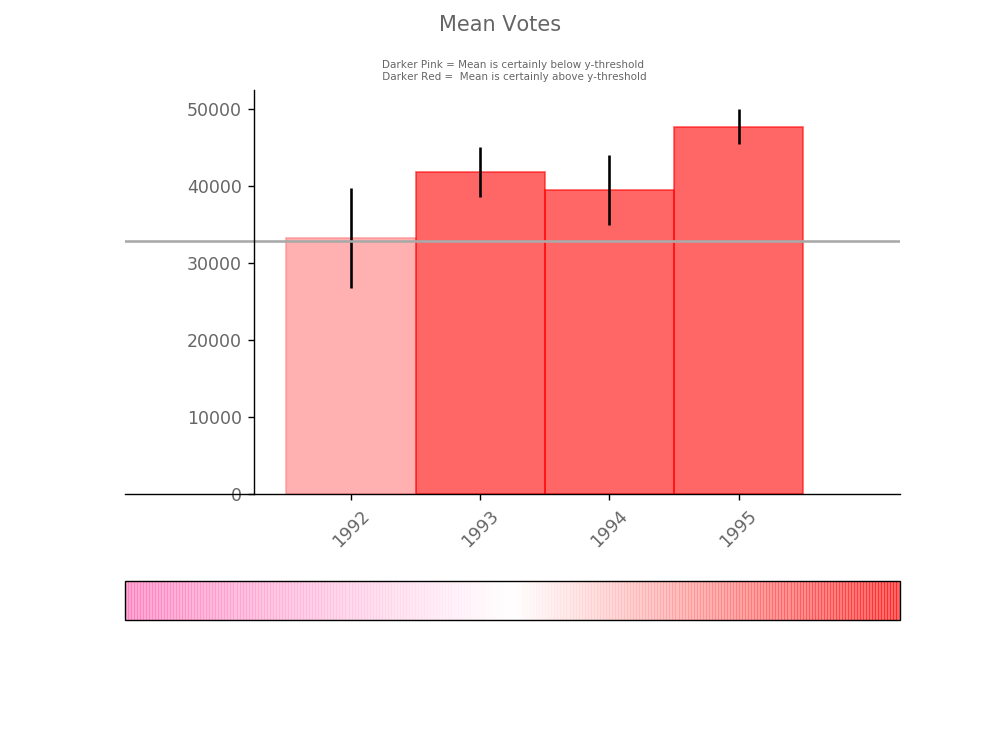

39821.8972586
45054.5512397
44047.8311789
50007.712894


In [100]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(8,6))
width=.2
xloc = [0.15,0,0,0]
for i in range(1,4):
    xloc[i] = xloc[i-1] + width

ax = plt.gca()
barplot = plt.bar(xloc, df['Mean'], width = width, 
                yerr = df['Marg Err'], edgecolor='k', alpha=.6)
d1 = diff(43_000)
for bar, d in zip(barplot, d1):
    bar.set_edgecolor("black")
    bar.set_color(cpick.to_rgba(d))
plt.xlim(-0.2, 1)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
axline = plt.axhline(y, color='darkgray', linestyle='-')

plt.xticks(xloc, [1992,1993,1994,1995],rotation=45, alpha=.6)
plt.yticks(alpha=.6)
plt.title('Darker Pink = Mean is certainly below y-threshold\n Darker Red =  Mean is certainly above y-threshold',
          loc = 'center', fontsize = 6, alpha =.6)
plt.suptitle('Mean Votes', alpha = .6, ha = 'center')

cm1 = mcol.LinearSegmentedColormap.from_list("PinkWhiteRed",["hotpink", "white", "red"]) 
                                                                                    
cpick = cm.ScalarMappable(cmap=cm1) 
cpick.set_array([]) 
colorbar = plt.colorbar(cpick, orientation='horizontal', alpha = .6) 
colorbar.set_ticks([])

def update(threshold):
    axline.set_ydata(threshold)
    d = diff(threshold)
    for bar, d in zip(barplot, d):
        bar.set_edgecolor("lightblue")
        bar.set_color(cpick.to_rgba(d))  
def movemouse(event):
    if event.inaxes == ax:
        y=event.ydata
        update(event.ydata)
        plt.draw()
    
    
fig.canvas.mpl_connect('motion_notify_event', movemouse)
plt.show()